<a href="https://colab.research.google.com/github/aditsijoshi/SureStart2021/blob/main/Day24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import librosa
import librosa.display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import tensorflow.keras
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import RMSprop
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from google.colab import files
from tensorflow.keras.models import model_from_json

'### Load the trained model -'

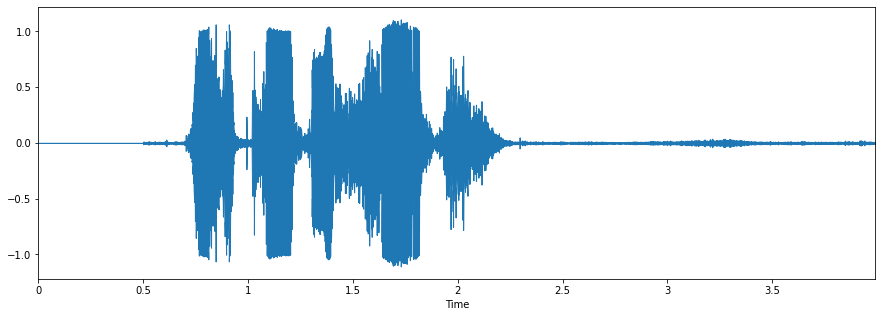

In [7]:
"""### Import the testing data (wav file) -"""

data, sampling_rate = librosa.load('/content/output10.wav')

plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

"""### Load the trained model -"""

In [9]:
json_file = open('/content/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/Emotion_Voice_Detection_Model.h5")
print("Loaded model from disk")
 
opt = RMSprop(lr=0.00001, decay=1e-6)

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

Loaded model from disk


In [10]:

X, sample_rate = librosa.load('/content/output10.wav', res_type='kaiser_fast', duration=2.5,sr=22050*2,offset=0.5)
sample_rate = np.array(sample_rate)
mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13),axis=0)
featurelive = mfccs
livedf2 = featurelive
print(livedf2)

[-18.203562   -21.471832   -22.522213   -21.71226    -22.264282
 -20.707907   -21.726439   -21.768646   -24.302736   -22.250633
 -19.952745   -21.589886   -22.871395   -21.074196   -22.644075
 -24.45673    -21.034203   -18.204836   -15.393932   -14.683822
 -16.088182   -15.269257   -10.341142    -7.5610247   -7.5037746
  -5.260729    -2.907981    -1.8102342   -8.35399    -11.253943
 -11.68832    -15.035958   -17.461966   -18.240295   -17.978508
 -14.967607   -15.628134   -17.499977   -19.311691   -21.08207
 -19.550135   -19.43281    -19.220457   -19.998161   -19.820381
 -15.993117   -12.351323   -10.900945    -7.707783    -6.838427
  -1.1790091   -0.5452339   -1.5137805   -3.6598551   -4.9872637
  -5.4561462   -6.2647815   -6.43962     -3.5473752   -1.2982885
  -3.311413    -5.420525   -13.854758   -14.625691   -17.21649
 -17.206194   -18.75077    -20.49142    -17.765928   -15.221232
 -14.081307   -14.514443   -15.049297   -16.291168   -13.718211
  -7.1977725   -5.0013633   -4.6790104 

In [11]:
livedf2= pd.DataFrame(data=livedf2)
livedf2 = livedf2.stack().to_frame().T

In [12]:
livedf2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215
,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,-18.203562,-21.471832,-22.522213,-21.712259,-22.264282,-20.707907,-21.726439,-21.768646,-24.302736,-22.250633,-19.952745,-21.589886,-22.871395,-21.074196,-22.644075,-24.45673,-21.034203,-18.204836,-15.393932,-14.683822,-16.088182,-15.269257,-10.341142,-7.561025,-7.503775,-5.260729,-2.907981,-1.810234,-8.35399,-11.253943,-11.68832,-15.035958,-17.461966,-18.240295,-17.978508,-14.967607,-15.628134,-17.499977,-19.311691,-21.082069,...,-24.037477,-23.211409,-23.118687,-23.47167,-23.638603,-23.450207,-23.264921,-22.719471,-22.14872,-22.658384,-22.88862,-23.306034,-23.30761,-24.259129,-26.328209,-26.651802,-24.688915,-25.379475,-25.8253,-25.058117,-23.847221,-25.266714,-23.488476,-22.239729,-21.664198,-22.395565,-23.06472,-23.522367,-22.248775,-22.428013,-24.273821,-24.639936,-24.929155,-24.439188,-25.210173,-24.740648,-22.311916,-22.579805,-22.314659,-21.552433


In [14]:
twodim= np.expand_dims(livedf2, axis=2)

In [15]:
livepreds = loaded_model.predict(twodim, 
                         batch_size=32, 
                         verbose=1)

1/1 [==============================] - 0s 451ms/step


In [16]:
livepreds

array([[9.2407384e-22, 0.0000000e+00, 3.6240224e-26, 1.3068817e-36,
        4.4726425e-28, 1.0000000e+00, 1.8020012e-30, 2.7687824e-27,
        3.6221893e-23, 1.6739410e-11]], dtype=float32)

In [17]:
livepreds1=livepreds.argmax(axis=1)
liveabc = livepreds1.astype(int).flatten()

In [18]:
# Prediction labels
prediction_classes = ["female_angry", "female_calm", "female_fearful", "female_happy", "female_sad", 
                      "male_angry", "male_calm", "male_fearful", "male_happy", "male_sad"]

print(f"Predicted emotion: {prediction_classes[liveabc[0]]}")

Predicted emotion: male_angry
